Introduction:



Import Libaries

In [196]:
print("hello world")
import requests
import pandas as pd # library for data analysis
import matplotlib.pyplot as plt
import time
import seaborn as sns
plt.style.use('seaborn')
import pip
import requests # library to handle requests
from bs4 import BeautifulSoup as bs # library to parse HTML documents
!pip install kaggle
!pip install --upgrade jedi==0.17.2
plt.style.use('seaborn')

hello world


This section will set up the Kaggle API

In [197]:
import os
cwd = os.getcwd()
print(cwd)
dir = os.path.join(cwd,".kaggle")
if not os.path.exists(dir):
    os.mkdir(dir)
    
    
!pip install kaggle
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

C:\Users\brminnoc\OneDrive - Microsoft\PPM Role\Career\Learning\Python\Project


Look for Some Data sets

In [198]:
!kaggle datasets list -s 'Pro'

ref                                                  title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/covid-world-vaccination-progress              COVID-19 World Vaccination Progress             1MB  2021-11-14 10:56:59          68477       1913  1.0              
kemical/kickstarter-projects                         Kickstarter Projects                           37MB  2018-02-08 09:02:30          58049       1470  0.7941176        
PromptCloudHQ/flipkart-products                      Flipkart Products                               5MB  2017-09-15 09:35:02          11034        144  1.0              
new-york-city/nyc-property-sales                     NYC Property Sales                              2MB  2017-09-22 19:43:30          19195     

Check that the Kaggle API is working Correctly


In [199]:
!kaggle datasets download fewinder/uci-pro-road-cycling-dataset

uci-pro-road-cycling-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Download the Historic Tour De France Dataset

https://www.kaggle.com/ralle360/historic-tour-de-france-dataset

In [200]:
#!kaggle datasets download -d "ralle360/historic-tour-de-france-dataset", "stages_TDF.csv"
api.dataset_download_file("ralle360/historic-tour-de-france-dataset", file_name = "stages_TDF.csv")


False

Download the UCI Pro Road Cycling Dataset
https://www.kaggle.com/fewinder/uci-pro-road-cycling-dataset
About this file
This dataset holds demographic and team information of every professional road cyclist from 2005 to 2019. Here, "professional" is defined as a member on a UCI registered road team. In 2016, continental team data is not available on the uci.org website.

In [201]:
api.dataset_download_file('fewinder/uci-pro-road-cycling-dataset',
                          file_name='UCIRiders0519_2x.csv',
                          path='APIData')


False

In [202]:
api.dataset_download_file('ralle360/historic-tour-de-france-dataset',
                          file_name='stages_TDF.csv',
                          path='APIData')  


False

In [203]:

import zipfile
with zipfile.ZipFile('APIData/UCIRiders0519_2x.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('APIData')


In [204]:
#UCIPro = pd.read_csv("data/ProCyclingData.csv")
UCIPro = pd.read_csv('APIData/UCIRiders0519_2x.csv')
TDFStages = pd.read_csv('APIData/stages_TDF.csv')

In [205]:
print(UCIPro.head())

   Year Function Last Name First Name  Birth date Birth date US  Age  Gender  \
0  2014    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   56    Male   
1  2013    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   55    Male   
2  2019    Rider     PITEL     Edwige  04/06/1967      6/4/1967   52  Female   
3  2018    Rider  NEDERLOF        Lex  10/06/1966     6/10/1966   52    Male   
4  2018    Rider     PITEL     Edwige  04/06/1967      6/4/1967   51  Female   

  Category Country Continent Team Code                             Team Name  \
0      CTM     CAN       AME       GQC                    GARNEAU - QUÉBECOR   
1      CTM     CAN       AME       GQC             EQUIPE GARNEAU - QUÉBECOR   
2      CTW     FRA       EUR       CGS  COGEAS METTLER LOOK PRO CYCLING TEAM   
3      CTM     NED       EUR       CCN                  NEX CCN CYCLING TEAM   
4      CTW     FRA       EUR       CGS     COGEAS - METTLER PRO CYCLING TEAM   

         UCIID  
0  10008746249  
1  1

In [206]:
print(TDFStages.head()) 

  Stage        Date  Distance             Origin  \
0     1  2017-07-01      14.0         Düsseldorf   
1     2  2017-07-02     203.5         Düsseldorf   
2     3  2017-07-03     212.5           Verviers   
3     4  2017-07-04     207.5  Mondorf-les-Bains   
4     5  2017-07-05     160.5             Vittel   

                    Destination                   Type          Winner  \
0                    Düsseldorf  Individual time trial  Geraint Thomas   
1                         Liège             Flat stage   Marcel Kittel   
2                        Longwy  Medium mountain stage     Peter Sagan   
3                        Vittel             Flat stage   Arnaud Démare   
4  La Planche des Belles Filles  Medium mountain stage       Fabio Aru   

  Winner_Country  
0            GBR  
1            GER  
2            SVK  
3            FRA  
4            ITA  


Backup Brexit Data:

api.dataset_download_file('electoralcommission/brexit-results',
                          file_name='census.csv',
                          path='ProjectData')
api.dataset_download_file('electoralcommission/brexit-results',
                          file_name='referendum.csv',
                          path='ProjectData')

Screap https://en.wikipedia.org/wiki/Tour_de_France_records_and_statistics
Most Stage wins
Sage Winnes



In [207]:
# importing the libraries
from bs4 import BeautifulSoup
import requests

Bring in Tour Ranking table from 2021: https://www.letour.fr/en/rankings


In [208]:
url='https://www.letour.fr/en/rankings'
TDFPage = requests.get(url)
soup = bs(TDFPage.content, 'lxml')

print(TDFResults.title)
print(TDFResults.title.text)

table = TDFResults.find("div", {"class":'rankingTables'})
#print(TDFResults.prettify()) 


<title>Official classifications of Tour de France 2022 - Stage 21</title>
Official classifications of Tour de France 2022 - Stage 21


In [209]:
TDFResults2021 = pd.read_html(str(table))[0]


In [210]:
print(TDFResults2021.head())

   Rank             Rider  Rank.1  Rider No.               Team         Times  \
0     1     TADEJ POGACAR       1          1  UAE TEAM EMIRATES  82h 56' 36''   
1     2  JONAS VINGEGAARD       2         18      JUMBO - VISMA  83h 01' 56''   
2     3   RICHARD CARAPAZ       3         22   INEOS GRENADIERS  83h 03' 39''   
3     4      BEN O'CONNOR       4        124  AG2R CITROEN TEAM  83h 06' 38''   
4     5   WILCO KELDERMAN       5         73   BORA - HANSGROHE  83h 06' 49''   

              Gap         B  P  
0               -  B : 36''  -  
1  + 00h 05' 20''  B : 12''  -  
2  + 00h 07' 03''   B : 8''  -  
3  + 00h 10' 02''  B : 10''  -  
4  + 00h 10' 13''         -  -  


I have crated 3 dataframes:
UCIPro
TDFStages
TDFResults2021

Lets Analyze the UCI Pro DF

In [211]:
#Lets look at the DF: UCIPro
print(UCIPro.head())

   Year Function Last Name First Name  Birth date Birth date US  Age  Gender  \
0  2014    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   56    Male   
1  2013    Rider   GARNEAU      Louis  09/08/1958      8/9/1958   55    Male   
2  2019    Rider     PITEL     Edwige  04/06/1967      6/4/1967   52  Female   
3  2018    Rider  NEDERLOF        Lex  10/06/1966     6/10/1966   52    Male   
4  2018    Rider     PITEL     Edwige  04/06/1967      6/4/1967   51  Female   

  Category Country Continent Team Code                             Team Name  \
0      CTM     CAN       AME       GQC                    GARNEAU - QUÉBECOR   
1      CTM     CAN       AME       GQC             EQUIPE GARNEAU - QUÉBECOR   
2      CTW     FRA       EUR       CGS  COGEAS METTLER LOOK PRO CYCLING TEAM   
3      CTM     NED       EUR       CCN                  NEX CCN CYCLING TEAM   
4      CTW     FRA       EUR       CGS     COGEAS - METTLER PRO CYCLING TEAM   

         UCIID  
0  10008746249  
1  1

In [212]:
def bill_with_tip(df):
    full_bill = df['total_bill'] + df['size']
    return round(full_bill,2)

In [213]:
# Find the Maximum Year:
print("I am now goint to look at the UCI Pro data from" , UCIPro["Year"].min(),  " to " , UCIPro["Year"].max())
UCIPro.info()
UCIPro.shape

I am now goint to look at the UCI Pro data from 2005  to  2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47442 entries, 0 to 47441
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           47442 non-null  int64 
 1   Function       47442 non-null  object
 2   Last Name      47441 non-null  object
 3   First Name     47442 non-null  object
 4   Birth date     47442 non-null  object
 5   Birth date US  47442 non-null  object
 6   Age            47442 non-null  int64 
 7   Gender         47442 non-null  object
 8   Category       47442 non-null  object
 9   Country        47442 non-null  object
 10  Continent      47442 non-null  object
 11  Team Code      47442 non-null  object
 12  Team Name      47442 non-null  object
 13  UCIID          47442 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 5.1+ MB


(47442, 14)

In [214]:
Over_35 = UCIPro["Age"] > 35
print(Over_35)

0         True
1         True
2         True
3         True
4         True
         ...  
47437    False
47438    False
47439    False
47440    False
47441    False
Name: Age, Length: 47442, dtype: bool


In [215]:
UCIPro["Age"].describe()


count    47442.000000
mean        25.799039
std          4.870689
min         18.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         56.000000
Name: Age, dtype: float64

Next I will Sort the UCIPro by Year

In [216]:
UCIPro = UCIPro.sort_values(by="Year", ascending = True)
UCIPro.head()

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID
47441,2005,Rider,WAHYUDI,Muhammad,12/09/1987,9/12/1987,18,Male,CTM,INA,ASI,WIT,WISMILAK INTERNATIONAL TEAM,10003296768
25291,2005,Rider,OKRUCINSKI,Daniel,31/03/1980,3/31/1980,25,Male,CTM,POL,EUR,PSB,GRUPA PSB - ATLAS - ORBEA,10002538451
25292,2005,Rider,OLDE DUBBELINK,Peter,07/01/1980,1/7/1980,25,Male,CTM,NED,EUR,LOW,TEAM LÖWIK MEUBELEN,10003178752
25293,2005,Rider,OREDSSON,Thomas,02/02/1980,2/2/1980,25,Male,CTM,DEN,EUR,VOL,VOLKSBANK LEINGRUBER IDEAL,10002483786
25294,2005,Rider,OTXOTORENA ARRARAS,Xabat,17/11/1980,11/17/1980,25,Male,CTM,ESP,EUR,ORB,ORBEA,10003208660


#UCIPro["UCID_Year"] = UCIPro["UCIID"]) + str(UCIPro["Year"]))
UCIPro.head()
UCIPro['UCIIDStr']=UCIPro["UCIID"].astype(str)
UCIPro['YearStr']=UCIPro["Year"].astype(str)
UCIPr['UCID_Year'] = UCIPro['UCIIDStr'] + UCIPro['YearStr']
UCIPro.head()

In [239]:
UCIAgeStats = UCIPro.groupby(['Year', "Gender"])['Age'].agg(['count','max','mean','median'])
#UCIPro.groupby("Year").count()
print(UCIAgeStats)

             count  max       mean  median
Year Gender                               
2005 Female    234   40  26.085470      26
     Male     2142   44  26.267507      26
2006 Female    318   44  25.779874      25
     Male     2742   43  25.985047      25
2007 Female    493   49  26.158215      25
     Male     2838   46  25.899577      25
2008 Female    462   50  25.580087      24
     Male     2664   47  25.712838      25
2009 Female    356   47  25.294944      24
     Male     2638   48  25.863154      25
2010 Female    332   48  25.524096      24
     Male     2532   49  25.862954      25
2011 Female    348   44  25.836207      25
     Male     2707   48  25.880680      25
2012 Female    447   50  25.612975      24
     Male     3011   47  25.734640      25
2013 Female    417   51  25.376499      24
     Male     3010   55  25.619934      25
2014 Female    388   47  25.332474      24
     Male     3154   56  25.491756      25
2015 Female    454   49  25.795154      25
     Male  

In [240]:
UCIAgeStats.reset_index()
UCIAgeStats.head

<bound method NDFrame.head of              count  max       mean  median
Year Gender                               
2005 Female    234   40  26.085470      26
     Male     2142   44  26.267507      26
2006 Female    318   44  25.779874      25
     Male     2742   43  25.985047      25
2007 Female    493   49  26.158215      25
     Male     2838   46  25.899577      25
2008 Female    462   50  25.580087      24
     Male     2664   47  25.712838      25
2009 Female    356   47  25.294944      24
     Male     2638   48  25.863154      25
2010 Female    332   48  25.524096      24
     Male     2532   49  25.862954      25
2011 Female    348   44  25.836207      25
     Male     2707   48  25.880680      25
2012 Female    447   50  25.612975      24
     Male     3011   47  25.734640      25
2013 Female    417   51  25.376499      24
     Male     3010   55  25.619934      25
2014 Female    388   47  25.332474      24
     Male     3154   56  25.491756      25
2015 Female    454   49 

In [241]:
UCIAgeStats.reset_index()

,Year,Gender,count,max,mean,median
0,2005,Female,234,40,26.085470,26
1,2005,Male,2142,44,26.267507,26
2,2006,Female,318,44,25.779874,25
3,2006,Male,2742,43,25.985047,25
4,2007,Female,493,49,26.158215,25
5,2007,Male,2838,46,25.899577,25
6,2008,Female,462,50,25.580087,24
7,2008,Male,2664,47,25.712838,25
8,2009,Female,356,47,25.294944,24
9,2009,Male,2638,48,25.863154,25


<AxesSubplot:xlabel='Year,Gender'>

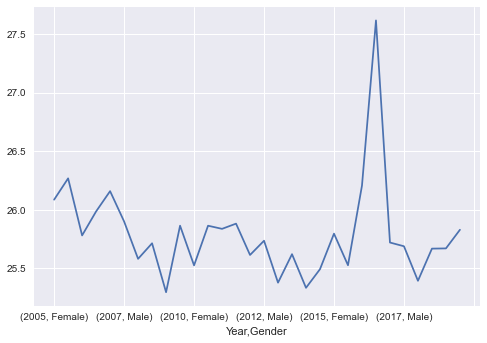

In [242]:
#UCIAgeStats.set_index('mean', inplace=True)
#UCIAgeStats.head()
UCIAgeStats['mean'].plot()

In [ ]:
for index, row in tips.head(2).iterrows():
    print(index)
    print(row)

Say we want to create a new column, to Career stage, i.e. Under = Young rider , 25 or over = Mature Rider.
First, Create a Career Stage Function

In [243]:
def Career_Sage(df):
    if df <= 24:
        return 'Young Rider'
    else:
        return "Mature Rider"

Run the Career Stage Function using .apply()

In [245]:
UCIPro['Career Stage'] = UCIPro['Age'].apply(Career_Sage)
UCIPro.tail()

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
44830,2019,Rider,KUBIŠ,Lukáš,31/01/2000,1/31/2000,19,Male,CTM,SVK,EUR,DKB,DUKLA BANSKA BYSTRICA,10023479135,Young Rider
44831,2019,Rider,KUHN,Jan,28/01/2000,1/28/2000,19,Male,CTM,GER,EUR,LKH,TEAM LOTTO - KERN HAUS,10043814072,Young Rider
44832,2019,Rider,KULBE,Lars,08/03/2000,3/8/2000,19,Male,CTM,GER,EUR,SVL,TEAM SAUERLAND NRW P / B SKS GERMANY,10036201693,Young Rider
44834,2019,Rider,LAVERICK,Joseph,06/12/2000,12/6/2000,19,Male,CTM,GBR,EUR,MGT,MADISON GENESIS,10023711026,Young Rider
21849,2019,Rider,RUMAC,Josip,26/10/1994,10/26/1994,25,Male,PCT,CRO,EUR,ANS,ANDRONI GIOCATTOLI - SIDERMEC,10007822729,Mature Rider


In [246]:
for index, row in UCIPro.head(2).iterrows():
    print(index)
    print(row)

47441
Year                                    2005
Function                               Rider
Last Name                            WAHYUDI
First Name                          Muhammad
Birth date                        12/09/1987
Birth date US                      9/12/1987
Age                                       18
Gender                                  Male
Category                                 CTM
Country                                  INA
Continent                                ASI
Team Code                                WIT
Team Name        WISMILAK INTERNATIONAL TEAM
UCIID                            10003296768
Career Stage                     Young Rider
Name: 47441, dtype: object
25291
Year                                  2005
Function                             Rider
Last Name                       OKRUCINSKI
First Name                          Daniel
Birth date                      31/03/1980
Birth date US                    3/31/1980
Age                         

for index, row in UCIPro[UCIPro["Last Name"] == "ROCHE"].iterrows():
    print(index)
    print(row)

In [253]:
UCIPro[UCIPro["Last Name"] == "ROCHE"]

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID,Career Stage
41356,2005,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,21,Male,PRO,IRL,EUR,COF,"COFIDIS, LE CREDIT PAR TELEPHONE",10002724872,Young Rider
37519,2006,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,22,Male,PRO,IRL,EUR,COF,"COFIDIS, LE CREDIT PAR TELEPHONE",10002724872,Young Rider
2749,2006,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,35,Male,CTM,IRL,EUR,TMG,TEAM MURPHY & GUNN / NEWLYN,10001143671,Mature Rider
33128,2007,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,23,Male,PRO,IRL,EUR,C.A,CREDIT AGRICOLE,10002724872,Young Rider
28601,2008,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,24,Male,PRO,IRL,EUR,C.A,CREDIT AGRICOLE,10002724872,Young Rider
1301,2008,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,37,Male,CTM,IRL,EUR,POT,PINARELLO RT,10001143671,Mature Rider
867,2009,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,38,Male,CTM,IRL,EUR,MPT,CANDI TV - MARSHALLS PASTA RT,10001143671,Mature Rider
24335,2009,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,25,Male,PRO,IRL,EUR,ALM,AG2R LA MONDIALE,10002724872,Mature Rider
564,2010,Rider,ROCHE,Andrew,22/11/1971,11/22/1971,39,Male,CTM,IRL,EUR,MPT,MOTORPOINT - MARSHALLS PASTA,10001143671,Mature Rider
20427,2010,Rider,ROCHE,Nicolas,03/07/1984,7/3/1984,26,Male,PRO,IRL,EUR,ALM,AG2R LA MONDIALE,10002724872,Mature Rider


In [264]:
for x in UCIPro:
    print(x)

Year
Function
Last Name
First Name
Birth date
Birth date US
Age
Gender
Category
Country
Continent
Team Code
Team Name
UCIID
Career Stage


In [267]:
#for Country, Age in UCIPro.iterrows():
 #   print(row['Gender'], row['Function'])
  #  https://www.youtube.com/watch?v=mT-2AxZLtvw

In [157]:
UCIProMale = UCIPro[UCIPro["Gender"] == "Male"]
UCIProMale.head()

,Year,Function,Last Name,First Name,Birth date,Birth date US,Age,Gender,Category,Country,Continent,Team Code,Team Name,UCIID
47441,2005,Rider,WAHYUDI,Muhammad,12/09/1987,9/12/1987,18,Male,CTM,INA,ASI,WIT,WISMILAK INTERNATIONAL TEAM,10003296768
25291,2005,Rider,OKRUCINSKI,Daniel,31/03/1980,3/31/1980,25,Male,CTM,POL,EUR,PSB,GRUPA PSB - ATLAS - ORBEA,10002538451
25292,2005,Rider,OLDE DUBBELINK,Peter,07/01/1980,1/7/1980,25,Male,CTM,NED,EUR,LOW,TEAM LÖWIK MEUBELEN,10003178752
25293,2005,Rider,OREDSSON,Thomas,02/02/1980,2/2/1980,25,Male,CTM,DEN,EUR,VOL,VOLKSBANK LEINGRUBER IDEAL,10002483786
25294,2005,Rider,OTXOTORENA ARRARAS,Xabat,17/11/1980,11/17/1980,25,Male,CTM,ESP,EUR,ORB,ORBEA,10003208660
